In [2]:
#importing libraries
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [3]:
#loading the dataset

data = pd.read_csv('Dataset.csv')
data

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [4]:
#calculating mean

mean_v1 = data['V1'].mean()
mean_v2 = data['V2'].mean()

print(mean_v1)
print(mean_v2)

0.43373525728862977
1.9223531209912539


In [5]:
#calculating standard deviation

sd_v1 = data['V1'].std()
sd_v2 = data['V2'].std()

print(sd_v1)
print(sd_v2)

2.8427625862451675
5.8690467435803795


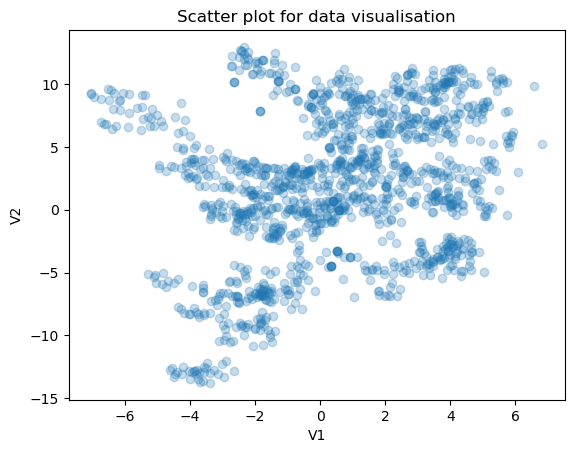

In [6]:
#visualising the dataset 

plot.scatter(data['V1'],data['V2'], alpha = 0.25)
plot.xlabel('V1')
plot.ylabel('V2')
plot.title('Scatter plot for data visualisation')

plot.show()

In [7]:
#importing the libraries for K-Means clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
numerical_columns = ['V1','V2']
X = data[numerical_columns]

In [8]:
#pre-processingthe data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91817\anaconda3\lib\site-packages\sklearn\clust

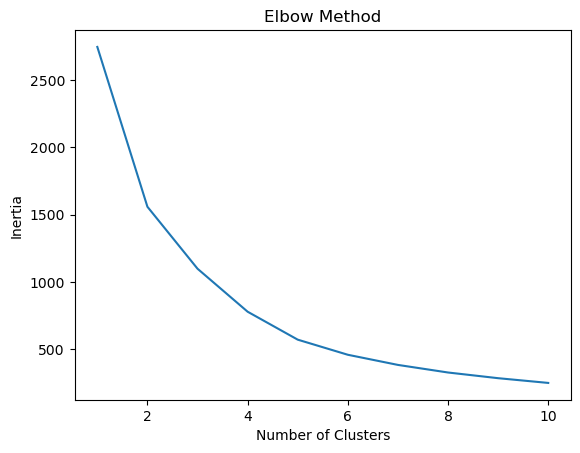

In [10]:
#determination of optimal number of clusters

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plot.plot(range(1, 11), inertia)
plot.xlabel('Number of Clusters')
plot.ylabel('Inertia')
plot.title('Elbow Method')
plot.show()


In [11]:
#applying the K-means clustering 

k = 3  #since according to the graph, datasets between 1000 - 1500 should have 2 - 4 clusters, so taking mean
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [13]:
#assigning cluster labels

data['Cluster'] = kmeans.labels_

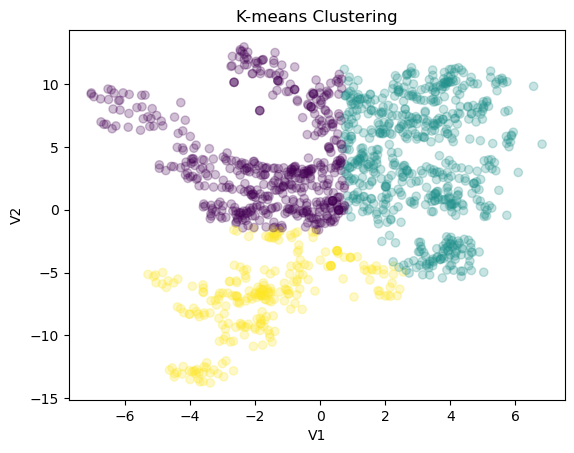

In [17]:
#visualising the cluster

plot.scatter(data['V1'], data['V2'], c = data['Cluster'], alpha = 0.25)
plot.xlabel('V1')
plot.ylabel('V2')
plot.title('K-means Clustering')
plot.show()
